# Module 1.3 homogeneous combustion in reactors
## constant pressure and constant volume reactors

See also https://cantera.org/science/reactors.html

Homogeneous combustion is the combustion of a homogeneous mixture with no local variation in composition. Think of a small sphere containing a perfectly mixed mixture of fuel and oxidizer. 
A batch reactor is a reactor where a fixed amount of fuel reacts in a closed volume, so no additional fuel and air is added to the vessel during combustion. These reactors are used produce chemicals. Several assumptions can be chosen for the volume. One is to consider a constant pressure reactor. In that case, the volume changes in time to keep the pressure constant. We consider such a constant pressure reactor here. 

In [1]:
# use notebook for jupyter notebook
#%matplotlib notebook
# use inline for jupyter labs
%matplotlib inline
import sys
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

We will put a mixture of hydrogen and air into a volume and keep the pressure constant.

In [2]:
"""
Constant-pressure, adiabatic kinetics simulation.
"""

# use the GRI 3.0 mechanism
gas = ct.Solution('gri30.xml')
# set the temperature, pressure and the initial mole fractions of 
# all the species present in the mixture.
gas.TPX = 1000.0, ct.one_atm, 'H2:2,O2:1,N2:4'
r = ct.IdealGasConstPressureReactor(gas)

# check what this is on the cantera documentation and verify that it is the correct model
reactorNetwork = ct.ReactorNet([r])
time = 0.0
# only a gaseous state, we add time 't' as an extra property
states = ct.SolutionArray(gas, extra=['t'])

print('%10s %10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','V [m^3]','u [J/kg]'))

for n in range(100):
    time += 1.e-5
    # we do a computation for 'time' seconds, starting from the previous solution. 
    # Cantera takes care of the 'internal' timesteps to ensure accuracy
    reactorNetwork.advance(time)
    states.append(r.thermo.state, t=time*1e3)
    print('%10.3e %10.3f %10.3f %10.3f %14.6e' % (reactorNetwork.time, r.T, r.thermo.P, r.volume, r.thermo.u))

     t [s]      T [K]     P [Pa]    V [m^3]       u [J/kg]
 1.000e-05   1000.000 101325.000      1.000   6.196334e+05
 2.000e-05   1000.000 101325.000      1.000   6.196333e+05
 3.000e-05   1000.000 101325.000      1.000   6.196333e+05
 4.000e-05   1000.000 101325.000      1.000   6.196333e+05
 5.000e-05   1000.000 101325.000      1.000   6.196333e+05
 6.000e-05   1000.000 101325.000      1.000   6.196333e+05
 7.000e-05   1000.000 101325.000      1.000   6.196332e+05
 8.000e-05   1000.000 101325.000      1.000   6.196332e+05
 9.000e-05   1000.000 101325.000      1.000   6.196331e+05
 1.000e-04   1000.001 101325.000      1.000   6.196330e+05
 1.100e-04   1000.001 101325.000      1.000   6.196329e+05
 1.200e-04   1000.002 101325.000      1.000   6.196327e+05
 1.300e-04   1000.003 101325.000      1.000   6.196323e+05
 1.400e-04   1000.004 101325.000      1.000   6.196318e+05
 1.500e-04   1000.007 101325.000      1.000   6.196310e+05
 1.600e-04   1000.011 101325.000      1.000   6.196297e+

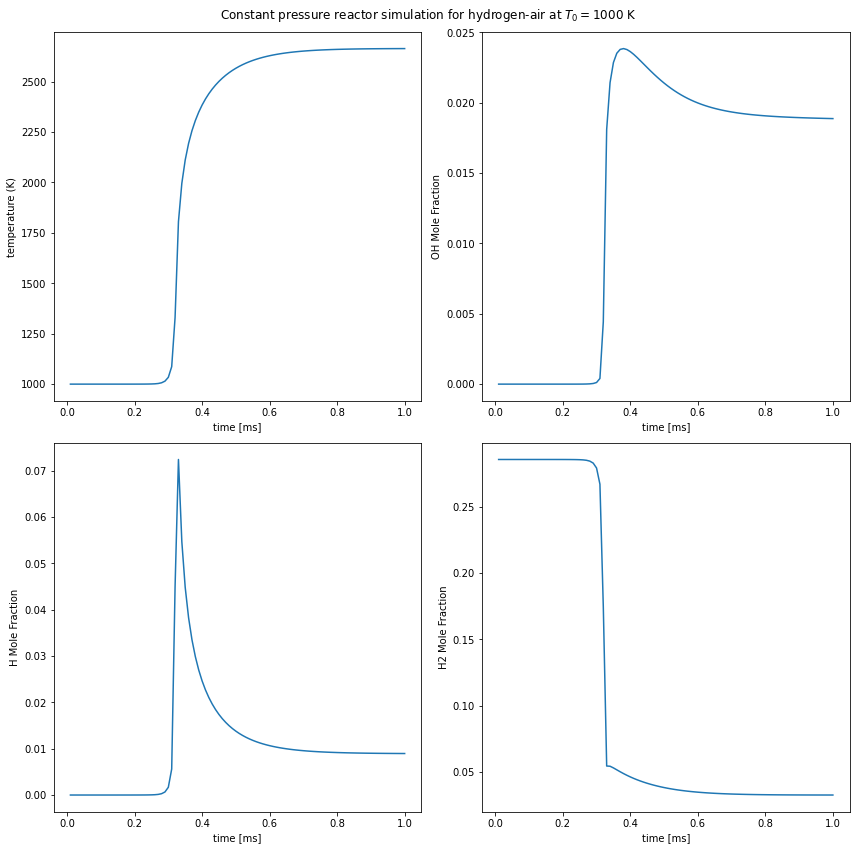

In [3]:
# globally change the size of all plots
plt.rcParams['figure.figsize'] = [12, 12]

plt.clf()
# 2 x 2 plot, start counting at 1 
plt.subplot(2, 2, 1)
plt.suptitle('Constant pressure reactor simulation for hydrogen-air at $T_0=1000$ K')
plt.plot(states.t, states.T)
plt.xlabel('time [ms]')
plt.ylabel('temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index('OH')])
plt.xlabel('time [ms]')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('H')])
plt.xlabel('time [ms]')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('H2')])
plt.xlabel('time [ms]')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()

Instead of constant pressure we can also use a constant volume reactor.

In [4]:
"""
Constant-volume, adiabatic kinetics simulation.
"""

# use the GRI 3.0 mechanism
gas2 = ct.Solution('gri30.xml')
# set the temperature, pressure and the initial mole fractions of 
# all the species present in the mixture.
gas2.TPX = 1000.0, ct.one_atm, 'H2:2,O2:1,N2:4'
r2 = ct.Reactor(gas2)

reactorNetwork2 = ct.ReactorNet([r2])
time = 0.0
# only a gaseous state, we add time 't' as an extra property
states2 = ct.SolutionArray(gas2, extra=['t'])

print('%10s %10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','V [m^3]', 'u [J/kg]'))
for n in range(100):
    time += 1.e-5
    reactorNetwork2.advance(time)
    states2.append(r2.thermo.state, t=time*1e3)
    print('%10.3e %10.3f %10.3f %10.3f %14.6e' % (reactorNetwork2.time, r2.T,
                                           r2.thermo.P, r2.volume, r2.thermo.u))

     t [s]      T [K]     P [Pa]    V [m^3]       u [J/kg]
 1.000e-05   1000.000 101325.012      1.000   6.196334e+05
 2.000e-05   1000.000 101325.013      1.000   6.196334e+05
 3.000e-05   1000.000 101325.014      1.000   6.196334e+05
 4.000e-05   1000.000 101325.015      1.000   6.196334e+05
 5.000e-05   1000.000 101325.018      1.000   6.196334e+05
 6.000e-05   1000.000 101325.024      1.000   6.196334e+05
 7.000e-05   1000.000 101325.032      1.000   6.196334e+05
 8.000e-05   1000.000 101325.045      1.000   6.196334e+05
 9.000e-05   1000.001 101325.066      1.000   6.196334e+05
 1.000e-04   1000.001 101325.099      1.000   6.196334e+05
 1.100e-04   1000.002 101325.149      1.000   6.196334e+05
 1.200e-04   1000.002 101325.226      1.000   6.196334e+05
 1.300e-04   1000.004 101325.344      1.000   6.196334e+05
 1.400e-04   1000.006 101325.526      1.000   6.196334e+05
 1.500e-04   1000.009 101325.806      1.000   6.196334e+05
 1.600e-04   1000.014 101326.238      1.000   6.196334e+

So what does the reactorNetwork2 class contain? 

In [5]:
dir(reactorNetwork2)

['__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'add_reactor',
 'advance',
 'advance_to_steady_state',
 'atol',
 'atol_sensitivity',
 'component_name',
 'get_state',
 'max_err_test_fails',
 'n_sensitivity_params',
 'n_vars',
 'reinitialize',
 'rtol',
 'rtol_sensitivity',
 'sensitivities',
 'sensitivity',
 'sensitivity_parameter_name',
 'set_initial_time',
 'set_max_time_step',
 'step',
 'time',
 'verbose']

We can now plot the reactor computations. 

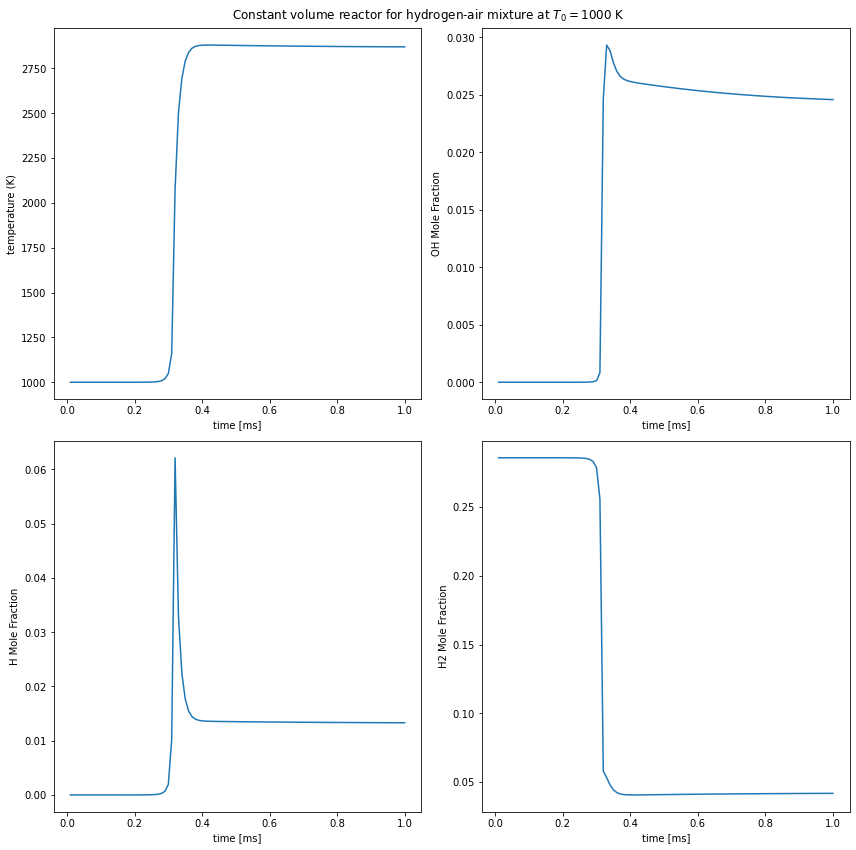

In [6]:
plt.clf()
# 2 x 2 plot, start counting at 1 
plt.subplot(2, 2, 1)
plt.suptitle('Constant volume reactor for hydrogen-air mixture at $T_0=1000$ K')
plt.plot(states2.t, states2.T)
plt.xlabel('time [ms]')
plt.ylabel('temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states2.t, states2.X[:,gas2.species_index('OH')])
plt.xlabel('time [ms]')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states2.t, states2.X[:,gas2.species_index('H')])
plt.xlabel('time [ms]')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states2.t, states2.X[:,gas2.species_index('H2')])
plt.xlabel('time [ms]')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()

We would like to see the difference between the constant pressure and constant volume reactor:

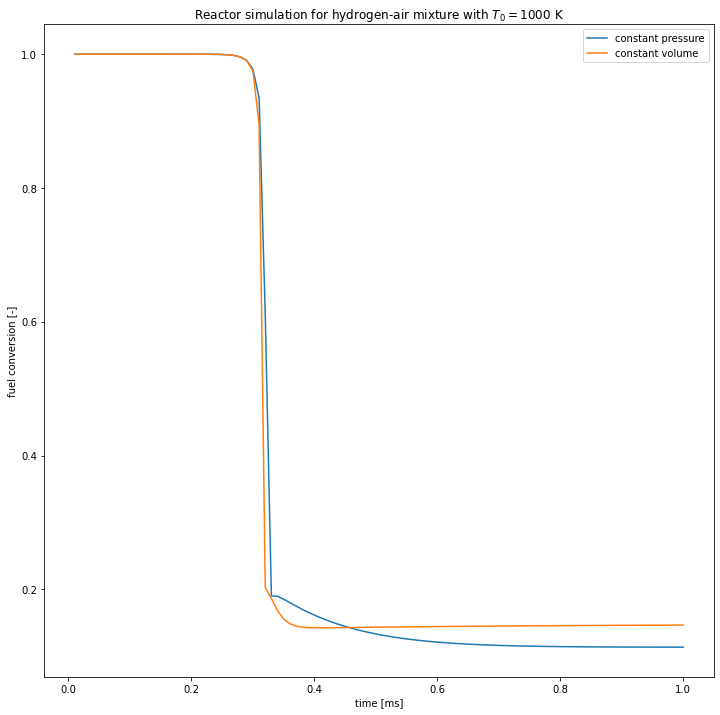

In [7]:
# conversion of fuel for constant pressure and constant volume reactor
H2_start = states.X[:,gas.species_index('H2')][0]
plt.plot(states.t,states.X[:,gas.species_index('H2')]/H2_start,label='constant pressure')
plt.plot(states2.t,states2.X[:,gas2.species_index('H2')]/H2_start,label='constant volume')
plt.title('Reactor simulation for hydrogen-air mixture with $T_0=1000$ K')
plt.xlabel('time [ms]')
plt.ylabel('fuel conversion [-]')
plt.legend()
plt.show()

The figure above shows the conversion of fuel (Hydrogen in this case) for a hydrogen-air mixture in a constant-pressure and constant-volume reactor. The final fuel conversion is larger for the constant pressure reactor. For the constant-pressure reactor the remaining fuel is 11.35 mole % (fuel conversion factor of 0.89) of the original amount, and for the constant-volume reactor it is 14.65 mole-% (fuel conversion factor of 0.85%).

Now what does the states class contain? We can show all class variables using *dir(states)*. Note that all variables in the class can be accessed using the syntax *states.variable*, for example *states.X* for the mole fractions and *states.cp* for the heat capacity.

In [8]:
dir(states)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'PV',
 'PX',
 'P_sat',
 'SH',
 'SP',
 'SPX',
 'SPY',
 'ST',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TH',
 'TP',
 'TPX',
 'TPY',
 'TV',
 'TX',
 'T_sat',
 'UP',
 'UV',
 'UVX',
 'UVY',
 'VH',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_call_scalar',
 '_extra_arrays',
 '_extra_lists',
 '_indices',
 '_interface_n_species',
 '_interface_passthrough',
 '_n_reactions',
 '_n_species',
 '_n_species2',
 '_n_total_species',
 '_output_dummy',
 '_passthrough',
 '_phase',
 '_scalar',
 '_shape',
 '_state2',
 '_states',
 'append',
 'atomic_weight',
 '

# Assignment 1.3

- Compare a constant pressure and constant volume reactor for methane-air and hydrogen-air at stoichiometric conditions and at equivalence ratio $\phi=0.8$. For this, plot next to each other a figure of the fuel mole fraction and the temperature. Describe what you see in the figures (similarities and differences). **[3 pts]**
- Determine the final fuel conversion factor for these 4 cases and show them in a bar graph. Describe what you see in the figures. Why does the fuel conversion stop? Also determine the reaction time, i.e. the time it takes to reach 99% of the conversion. **[3 pts]**
- Plot the equilibrium temperature $T(\phi)$ of module 1.2 together with the final equilibrium values of the constant P and constant V methane-air results . Why the difference? **[3 pts]**  

As always, give a scientific description of your figures, explain what we see and why. 